# Exploración y preprocesamiento de Datos

Este notebook tiene como objetivo analizar y preparar los datos antes del entrenamiento del modelo de Machine Learning. Exploraremos la distribución de las variables, identificaremos valores atípicos y aplicaremos transformaciones necesarias para mejorar el rendimiento del modelo.


### Carga de datos

In [7]:
import pandas as pd

df = pd.read_csv("../fraudDataset.csv")

df.head()



,a,b,c,d,e,f,g,h,j,k,l,m,n,o,p,fecha,monto,score,fraude
0,4,0.6812,50084.12,50.0,0.000000,20.0,AR,1,cat_d26ab52,0.365475,2479.0,952.0,1,NaN,Y,2020-03-20 09:28:19,57.63,100,0
1,4,0.6694,66005.49,0.0,0.000000,2.0,AR,1,cat_ea962fb,0.612728,2603.0,105.0,1,Y,Y,2020-03-09 13:58:28,40.19,25,0
2,4,0.4718,7059.05,4.0,0.463488,92.0,BR,25,cat_4c2544e,0.651835,2153.0,249.0,1,Y,Y,2020-04-08 12:25:55,5.77,23,0
3,4,0.7260,10043.10,24.0,0.046845,43.0,BR,43,cat_1b59ee3,0.692728,4845.0,141.0,1,N,Y,2020-03-14 11:46:13,40.89,23,0
4,4,0.7758,16584.42,2.0,0.154616,54.0,BR,0,cat_9bacaa5,0.201354,2856.0,18.0,1,Y,N,2020-03-23 14:17:13,18.98,71,0


### Exploración inicial.

In [8]:
# Dimensiones del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Valores nulos
print("\nValores nulos:")
print(df.isnull().sum())

El dataset tiene 150000 filas y 19 columnas.

Tipos de datos:
a           int64
b         float64
c         float64
d         float64
e         float64
f         float64
g          object
h           int64
j          object
k         float64
l         float64
m         float64
n           int64
o          object
p          object
fecha      object
monto     float64
score       int64
fraude      int64
dtype: object

Valores nulos:
a              0
b          12984
c          12984
d            365
e              0
f             11
g            194
h              0
j              0
k              0
l             11
m            365
n              0
o         108857
p              0
fecha          0
monto          0
score          0
fraude         0
dtype: int64


### Analisis univariado y bivariado

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns

# Definir tamaño de la cuadrícula
num_cols = len(numeric_cols)
num_filas = (num_cols // 4) + (1 if num_cols % 4 != 0 else 0)  # Calcular filas necesarias

# Crear subplots
fig, axes = plt.subplots(num_filas, 4, figsize=(16, 4 * num_filas))  # Ajusta el tamaño

# Aplanar el array de ejes si hay varias filas
axes = axes.flatten()

# Graficar histogramas
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

# Eliminar ejes vacíos si hay menos de 4 columnas en la última fila
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ajusta el espacio entre gráficos
plt.show()


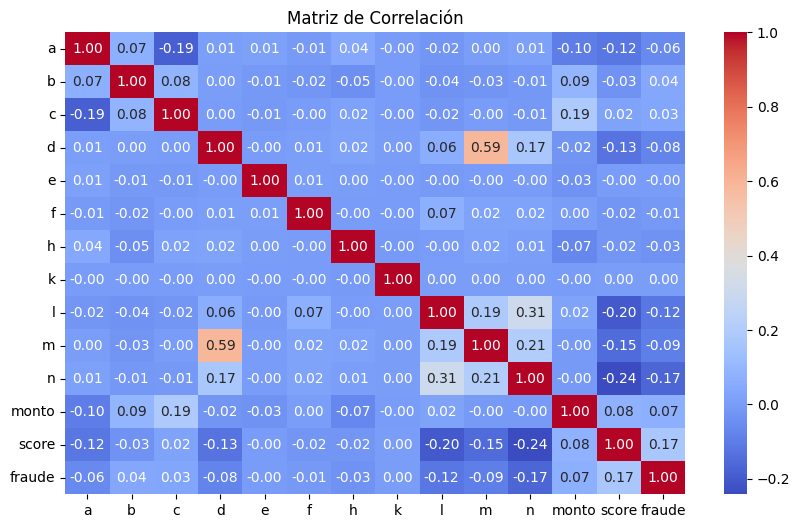

In [13]:
# Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Crear el heatmap de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


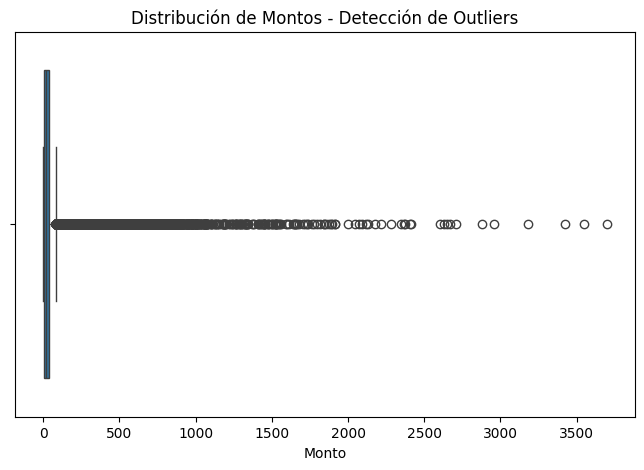

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columna_monto = "monto"  

# Boxplot para analizar valores extremos
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[columna_monto])
plt.title("Distribución de Montos - Detección de Outliers")
plt.xlabel("Monto")
plt.show()
